In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
import sys
import json 
import pandas as pd 
import numpy as np 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [132]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import bilby_priors_dict
import logging 
import numpy as np 
import bilby
from plotting import plot_observations

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:Running for two deterministic GW sources
INFO:root:You are assigning the σp terms randomly


INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Pulsar terms measurement model
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters


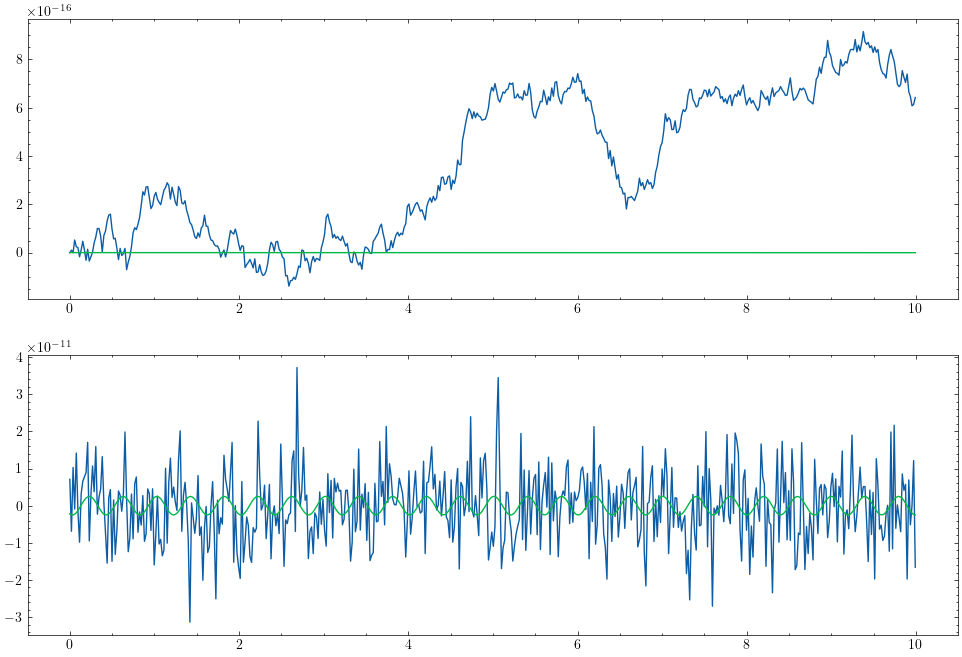

likelihood =  -34724.256343247784


In [135]:



h = 1 #doesnt matter
measurement_model = 'pulsar' 
seed = 1237
num_gw_sources = 2 


# h=1e-10,
# σp=1e-15,
# σm=1e-12,
# Npsr=20,
# cadence=0.5



#Setup the system
P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,num_gw_sources=num_gw_sources) # define the system parameters as a dict. Todo: make this a class

#P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,num_gw_sources=num_gw_sources) # define the system parameters as a dict. Todo: make this a class
PTA = Pulsars(P)                                       # setup the PTA
data = SyntheticData(PTA,P)                            # generate some synthetic data

#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

init_parameters_optimal, priors_optimal = bilby_priors_dict(PTA,P,set_parameters_as_known=True)
optimal_parameters = priors_optimal.sample(1)
model_likelihood,xres,yres = KF.likelihood_with_results(optimal_parameters)
plot_observations(data,xp=xres,yp=yres,psr_index=1)
print ("likelihood = ", model_likelihood)

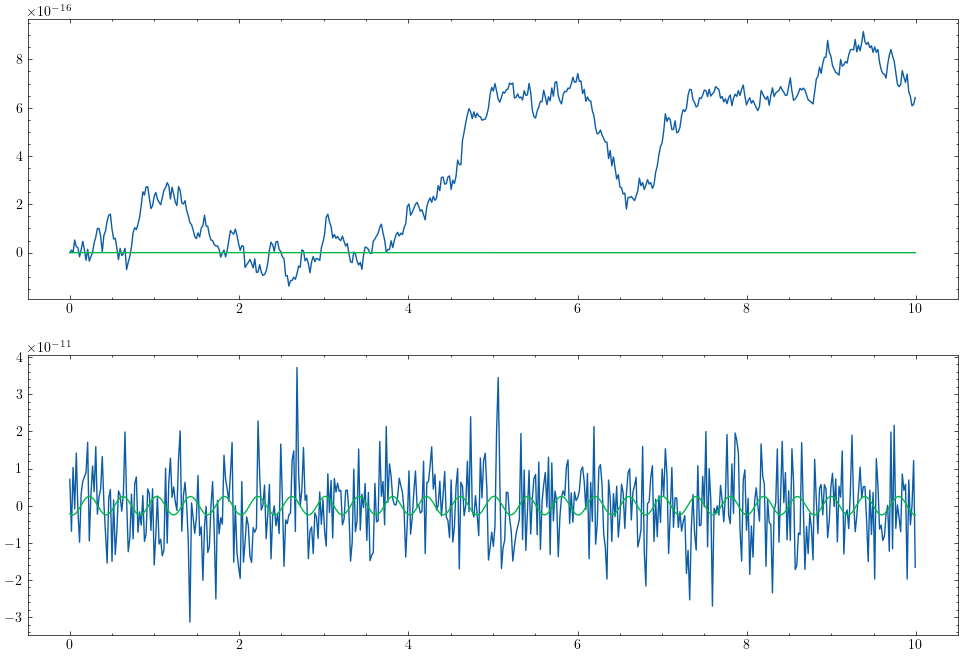

0.04836227795749437


In [136]:


suboptimal_parameters = optimal_parameters.copy()
suboptimal_parameters['phi0_gw_0'] = np.array(0.2)
suboptimal_parameters['phi0_gw_1'] = np.array(1.45)



new_model_likelihood,xres_new,yres_new = KF.likelihood_with_results(suboptimal_parameters)
plot_observations(data,xp=xres_new,yp=yres_new,psr_index=1)

print(new_model_likelihood - model_likelihood)

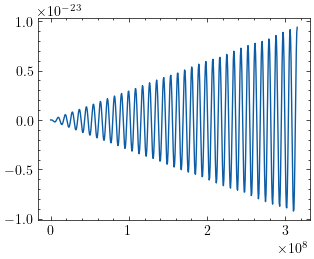

In [121]:
psr_index = 1
xres[:,psr_index]


import matplotlib.pyplot as plt 

plt.plot(data.t,xres_new[:,psr_index]-xres[:,psr_index] )

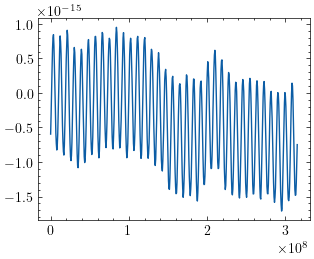

In [126]:
plt.plot(data.t,yres_new[:,psr_index]-data.f_measured_clean[:,psr_index] )

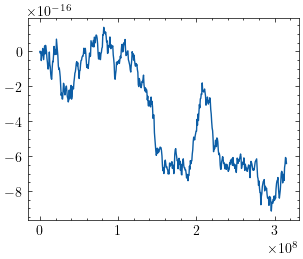

In [125]:
plt.plot(data.t,yres[:,psr_index]-data.f_measured_clean[:,psr_index] )

In [114]:
xres_new*1e22

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.95339454e+00, -3.99844465e-01,  1.34433832e+00, ...,
        -9.78130243e-01,  6.67004035e-01, -6.34829733e-02],
       [ 1.04922382e+00,  1.90621100e+00, -1.90740705e+01, ...,
         1.88125960e+00,  5.33228735e+00, -1.32271140e+00],
       ...,
       [-2.41004080e+04, -2.67245341e+03, -5.43955604e+04, ...,
         1.09295136e+04, -6.98035975e+02,  2.81786922e+03],
       [-2.71655942e+04, -1.99182084e+03, -5.46527283e+04, ...,
         9.61140200e+03, -4.83833453e+02,  1.81150051e+03],
       [-3.00461350e+04, -2.65295629e+03, -5.29093526e+04, ...,
         1.06147520e+04, -3.02418636e+02,  2.33708557e+03]])